In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

def scaled_dot_product_attention(Q, K, V):
    """
    Q, K, V: [batch, seq_len, d_k]
    Returns: output, attention_weights
    """
    d_k = Q.size(-1)
    scores = torch.matmul(Q, K.transpose(-2, -1)) / torch.sqrt(torch.tensor(d_k, dtype=torch.float32))
    attention_weights = F.softmax(scores, dim=-1)
    output = torch.matmul(attention_weights, V)
    return output, attention_weights

# Test
Q = torch.randn(1, 6, 8)
K = torch.randn(1, 6, 8)
V = torch.randn(1, 6, 8)

output, weights = scaled_dot_product_attention(Q, K, V)
print(f"Output shape: {output.shape}")
print(f"Weights shape: {weights.shape}")
print("✅ Attention working")

Matplotlib is building the font cache; this may take a moment.


Output shape: torch.Size([1, 6, 8])
Weights shape: torch.Size([1, 6, 6])
✅ Attention working


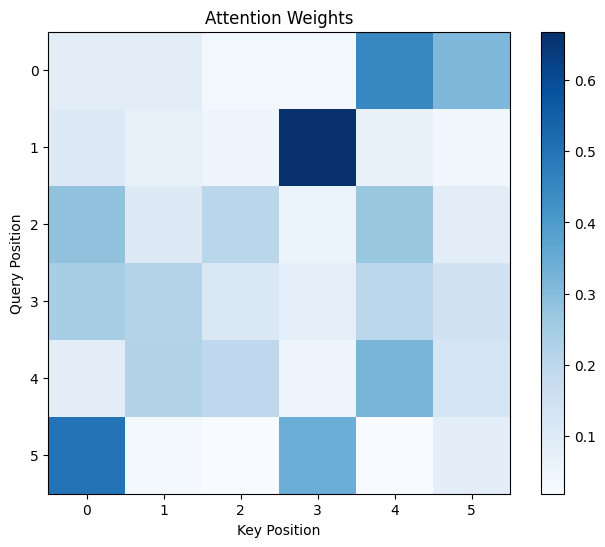

✅ Saved attention_viz.png


In [2]:
plt.figure(figsize=(8, 6))
plt.imshow(weights[0].detach().numpy(), cmap='Blues')
plt.colorbar()
plt.xlabel('Key Position')
plt.ylabel('Query Position')
plt.title('Attention Weights')
plt.savefig('attention_viz.png')
plt.show()
print("✅ Saved attention_viz.png")

In [3]:
class SingleHeadAttention(nn.Module):
    def __init__(self, d_model, d_k):
        super().__init__()
        self.d_k = d_k
        self.W_q = nn.Linear(d_model, d_k)
        self.W_k = nn.Linear(d_model, d_k)
        self.W_v = nn.Linear(d_k, d_k)
        
    def forward(self, x):
        Q = self.W_q(x)
        K = self.W_k(x)
        V = self.W_v(x)
        
        d_k = Q.size(-1)
        scores = torch.matmul(Q, K.transpose(-2, -1)) / torch.sqrt(torch.tensor(d_k, dtype=torch.float32))
        attention_weights = F.softmax(scores, dim=-1)
        output = torch.matmul(attention_weights, V)
        
        return output, attention_weights

# Test
d_model = 512
d_k = 64
x = torch.randn(2, 10, d_model)

attention = SingleHeadAttention(d_model, d_k)
output, weights = attention(x)

print(f"Input: {x.shape}")
print(f"Output: {output.shape}")
print(f"Parameters: {sum(p.numel() for p in attention.parameters()):,}")
print("✅ Module working")

RuntimeError: mat1 and mat2 shapes cannot be multiplied (20x512 and 64x64)

In [ ]:
class SingleHeadAttention(nn.Module):
    def __init__(self, d_model, d_k):
        super().__init__()
        self.d_k = d_k
        self.W_q = nn.Linear(d_model, d_k)
        self.W_k = nn.Linear(d_model, d_k)
        self.W_v = nn.Linear(d_k, d_k)
        
    def forward(self, x):
        Q = self.W_q(x)
        K = self.W_k(x)
        V = self.W_v(x)
        
        d_k = Q.size(-1)
        scores = torch.matmul(Q, K.transpose(-2, -1)) / torch.sqrt(torch.tensor(d_k, dtype=torch.float32))
        attention_weights = F.softmax(scores, dim=-1)
        output = torch.matmul(attention_weights, V)
        
        return output, attention_weights

# Test
d_model = 512
d_k = 64
x = torch.randn(2, 10, d_model)

attention = SingleHeadAttention(d_model, d_k)
output, weights = attention(x)

print(f"Input: {x.shape}")
print(f"Output: {output.shape}")
print(f"Parameters: {sum(p.numel() for p in attention.parameters()):,}")
print("✅ Module working")